# Clarke's experiment symbolic simulation for single-photon pure polarization states

## Context

In this notebook we symbolically compute unitary evolution associated to Clarke's experiment (https://doi.org/10.1103/PhysRevA.63.040305) for unambiguous discrimination of single-photon polarization states with the addition of an ancilla photon in one of the input ports. For this purpose we use the *sympy* package. We test multiple single-photon states at the original input and also different parameters for the optical elements.

In the end, we perform a brief parameter analysis in order to find the minimum fidelity between the output photon distributions for boxes A and B such that we are able to discriminate them.

## Output

- Symbolic output photon states
- Symbolic output photon distributions
- Symbolic fidelity between the distributions of boxes A and B

In [2]:
from sympy import *
from sympy.physics.quantum import TensorProduct

In [3]:
var("s1 s2 s3 s4")
var("a1 a2 a3 a4", real=True)

# lower case for 2x2 matrices, upper case for 6x6 matrices

alpha = pi/8 # half angle between the states
opt_a2 = asin(tan(alpha))/2

S0 = Matrix([s1,s2,s3,s4]) # initial state vector
idd = eye(2)
IDD = eye(4)
zero = idd*0
qwp1 = Matrix([[1,0],[0,-I]])
hwp1 = Matrix([[cos(2*a1),sin(2*a1)],[sin(2*a1),-cos(2*a1)]]).subs(a1,3*alpha/2)
hwp2 = Matrix([[cos(2*a2),sin(2*a2)],[sin(2*a2),-cos(2*a2)]]).subs(a2,opt_a2)
hwp3 = Matrix([[cos(2*a3),sin(2*a3)],[sin(2*a3),-cos(2*a3)]]).subs(a3,pi/4)
hwp4 = Matrix([[cos(2*a4),sin(2*a4)],[sin(2*a4),-cos(2*a4)]]).subs(a4,3*pi/8)

In [4]:
# wave plates
QWP1 = Matrix(BlockMatrix([[qwp1,zero],[zero,idd]]))
HWP1 = Matrix(BlockMatrix([[hwp1,zero],[zero,idd]]))
HWP2 = Matrix(BlockMatrix([[hwp2,zero],[zero,idd]]))
HWP3 = Matrix(BlockMatrix([[idd,zero],[zero,hwp3]]))
HWP4 = Matrix(BlockMatrix([[idd,zero],[zero,hwp4]]))

# polarizing beam splitter
PBS = IDD.copy()
PBS[1,1] = PBS[3,3] = 0
PBS[1,3] = PBS[3,1] = 1

In [5]:
# Preparation stage (QWP1 and HWP1)
 
S1 = HWP1.multiply(QWP1.multiply(S0))
S1

Matrix([
[s1*sqrt(1/2 - sqrt(2)/4) - I*s2*sqrt(sqrt(2)/4 + 1/2)],
[s1*sqrt(sqrt(2)/4 + 1/2) + I*s2*sqrt(1/2 - sqrt(2)/4)],
[                                                   s3],
[                                                   s4]])

In [6]:
# Stage 2 (PBS1 and HWP2 and HWP3)

S2 = HWP3.multiply(HWP2.multiply(PBS.multiply(S1)))
S2

Matrix([
[ s4*(-1 + sqrt(2)) + sqrt(1 - (1 - sqrt(2))**2)*(s1*sqrt(1/2 - sqrt(2)/4) - I*s2*sqrt(sqrt(2)/4 + 1/2))],
[-s4*sqrt(1 - (1 - sqrt(2))**2) + (-1 + sqrt(2))*(s1*sqrt(1/2 - sqrt(2)/4) - I*s2*sqrt(sqrt(2)/4 + 1/2))],
[                                                  s1*sqrt(sqrt(2)/4 + 1/2) + I*s2*sqrt(1/2 - sqrt(2)/4)],
[                                                                                                     s3]])

In [7]:
# Stage 3 (PBS2 and PBS3 and HWP4)

S3 = HWP4.multiply(PBS.multiply(S2))
S3

Matrix([
[                                                                                  s4*(-1 + sqrt(2)) + sqrt(1 - (1 - sqrt(2))**2)*(s1*sqrt(1/2 - sqrt(2)/4) - I*s2*sqrt(sqrt(2)/4 + 1/2))],
[                                                                                                                                                                                      s3],
[-sqrt(2)*(s1*sqrt(sqrt(2)/4 + 1/2) + I*s2*sqrt(1/2 - sqrt(2)/4))/2 + sqrt(2)*(-s4*sqrt(1 - (1 - sqrt(2))**2) + (-1 + sqrt(2))*(s1*sqrt(1/2 - sqrt(2)/4) - I*s2*sqrt(sqrt(2)/4 + 1/2)))/2],
[ sqrt(2)*(s1*sqrt(sqrt(2)/4 + 1/2) + I*s2*sqrt(1/2 - sqrt(2)/4))/2 + sqrt(2)*(-s4*sqrt(1 - (1 - sqrt(2))**2) + (-1 + sqrt(2))*(s1*sqrt(1/2 - sqrt(2)/4) - I*s2*sqrt(sqrt(2)/4 + 1/2)))/2]])

# Introducing a photon in the second port

In [8]:
var("theta phi", real=True)

S_test = S3.subs([(s3,cos(theta)),(s4,(cos(phi)+I*sin(phi))*sin(theta))]) # introducing a photon in the second port
S_test

Matrix([
[                                                                                  (-1 + sqrt(2))*(I*sin(phi) + cos(phi))*sin(theta) + sqrt(1 - (1 - sqrt(2))**2)*(s1*sqrt(1/2 - sqrt(2)/4) - I*s2*sqrt(sqrt(2)/4 + 1/2))],
[                                                                                                                                                                                                              cos(theta)],
[-sqrt(2)*(s1*sqrt(sqrt(2)/4 + 1/2) + I*s2*sqrt(1/2 - sqrt(2)/4))/2 + sqrt(2)*(-sqrt(1 - (1 - sqrt(2))**2)*(I*sin(phi) + cos(phi))*sin(theta) + (-1 + sqrt(2))*(s1*sqrt(1/2 - sqrt(2)/4) - I*s2*sqrt(sqrt(2)/4 + 1/2)))/2],
[ sqrt(2)*(s1*sqrt(sqrt(2)/4 + 1/2) + I*s2*sqrt(1/2 - sqrt(2)/4))/2 + sqrt(2)*(-sqrt(1 - (1 - sqrt(2))**2)*(I*sin(phi) + cos(phi))*sin(theta) + (-1 + sqrt(2))*(s1*sqrt(1/2 - sqrt(2)/4) - I*s2*sqrt(sqrt(2)/4 + 1/2)))/2]])

In [9]:
SH = S_test.subs([(s1,1),(s2,0)]) # Horizontal photon
simplify(SH)

Matrix([
[                                (-1 + sqrt(2))*exp(I*phi)*sin(theta) + sqrt(1 - (1 - sqrt(2))**2)*sqrt(2 - sqrt(2))/2],
[                                                                                                           cos(theta)],
[sqrt(2)*(-2*sqrt(1 - (1 - sqrt(2))**2)*exp(I*phi)*sin(theta) - sqrt(sqrt(2) + 2) - (1 - sqrt(2))*sqrt(2 - sqrt(2)))/4],
[sqrt(2)*(-2*sqrt(1 - (1 - sqrt(2))**2)*exp(I*phi)*sin(theta) - (1 - sqrt(2))*sqrt(2 - sqrt(2)) + sqrt(sqrt(2) + 2))/4]])

In [10]:
SV = S_test.subs([(s1,0),(s2,1)]) # Vertical photon
simplify(SV)

Matrix([
[                                 (-1 + sqrt(2))*exp(I*phi)*sin(theta) - I*sqrt(1 - (1 - sqrt(2))**2)*sqrt(sqrt(2) + 2)/2],
[                                                                                                              cos(theta)],
[sqrt(2)*(-2*sqrt(1 - (1 - sqrt(2))**2)*exp(I*phi)*sin(theta) - sqrt(-2 + sqrt(2)) - sqrt(-2 - sqrt(2))*(-1 + sqrt(2)))/4],
[sqrt(2)*(-2*sqrt(1 - (1 - sqrt(2))**2)*exp(I*phi)*sin(theta) - sqrt(-2 - sqrt(2))*(-1 + sqrt(2)) + sqrt(-2 + sqrt(2)))/4]])

In [11]:
SL = S_test.subs([(s1,1/sqrt(2)),(s2,I/sqrt(2))]) # Left circular photon
simplify(SL)

Matrix([
[                                      -(1 - sqrt(2))*exp(I*phi)*sin(theta) + sqrt(2 - 2*(1 - sqrt(2))**2)*(sqrt(2 - sqrt(2))/4 + sqrt(sqrt(2) + 2)/4)],
[                                                                                                                                           cos(theta)],
[-sqrt(1 - sqrt(2))*sin(phi)*sin(theta) - sqrt(-1 + sqrt(2))*sin(theta)*cos(phi) - sqrt(sqrt(2) + 2)/2 + sqrt(4 - 2*sqrt(2))/4 + sqrt(2*sqrt(2) + 4)/4],
[-sqrt(1 - sqrt(2))*sin(phi)*sin(theta) - sqrt(-1 + sqrt(2))*sin(theta)*cos(phi) - sqrt(2 - sqrt(2))/2 + sqrt(4 - 2*sqrt(2))/4 + sqrt(2*sqrt(2) + 4)/4]])

In [12]:
SR = S_test.subs([(s1,1/sqrt(2)),(s2,-I/sqrt(2))]) # Right circular photon
simplify(SR)

Matrix([
[                                     -(1 - sqrt(2))*exp(I*phi)*sin(theta) + sqrt(2 - 2*(1 - sqrt(2))**2)*(-sqrt(sqrt(2) + 2)/4 + sqrt(2 - sqrt(2))/4)],
[                                                                                                                                           cos(theta)],
[-sqrt(1 - sqrt(2))*sin(phi)*sin(theta) - sqrt(-1 + sqrt(2))*sin(theta)*cos(phi) - sqrt(2*sqrt(2) + 4)/4 - sqrt(2 - sqrt(2))/2 + sqrt(4 - 2*sqrt(2))/4],
[-sqrt(1 - sqrt(2))*sin(phi)*sin(theta) - sqrt(-1 + sqrt(2))*sin(theta)*cos(phi) - sqrt(2*sqrt(2) + 4)/4 + sqrt(4 - 2*sqrt(2))/4 + sqrt(sqrt(2) + 2)/2]])

In [13]:
PH = SH.multiply_elementwise(conjugate(SH))
PV = SV.multiply_elementwise(conjugate(SV))
PA = simplify(re(PH+PV)/2)
PA

Matrix([
[                                                                                                                                                                                                                                                                  -(-1 + sqrt(2))**(3/2)*sqrt(2*sqrt(2) + 4)*sin(phi)*sin(theta)/2 + (1 - sqrt(2))**2*sin(theta)**2 + (-1 + sqrt(2))**(3/2)*sqrt(4 - 2*sqrt(2))*sin(theta)*cos(phi)/2 - (1 - sqrt(2))**2/2 + 1/2],
[                                                                                                                                                                                                                                                                                                                                                                                                                                                   cos(theta)**2],
[-sqrt(-2 + 2*sqrt(2))*sqrt(sqrt(2) + 2)*sin(phi)*sin(theta)/4 + sqrt(-2 + 2*sqrt(2))*s

In [14]:
PL = SL.multiply_elementwise(conjugate(SL))
PR = SR.multiply_elementwise(conjugate(SR))
PB = simplify(re(PL+PR)/2)
PB

Matrix([
[                               -2*sqrt(2)*sin(theta)**2 + 3*sin(theta)**2 - sqrt(-4 + 3*sqrt(2))*sin(theta)*cos(phi) + sqrt(2)*sqrt(-4 + 3*sqrt(2))*sin(theta)*cos(phi) - 1 + sqrt(2)],
[                                                                                                                                                                        cos(theta)**2],
[-sqrt(2)*sqrt(-4 + 3*sqrt(2))*sin(theta)*cos(phi)/2 + sqrt(-4 + 3*sqrt(2))*sin(theta)*cos(phi)/2 + 2**(1/4)*sin(theta)*cos(phi)/2 - sqrt(2)*cos(theta)**2 + cos(theta)**2 + sqrt(2)/2],
[-2**(1/4)*sin(theta)*cos(phi)/2 - sqrt(2)*sqrt(-4 + 3*sqrt(2))*sin(theta)*cos(phi)/2 + sqrt(-4 + 3*sqrt(2))*sin(theta)*cos(phi)/2 - sqrt(2)*cos(theta)**2 + cos(theta)**2 + sqrt(2)/2]])

In [15]:
# Fidelity between the two distributions
# Minimizing the fidelity allows for a better discrimination
F = 0
for i in range(4):
    F += sqrt(PA[i]*PB[i])

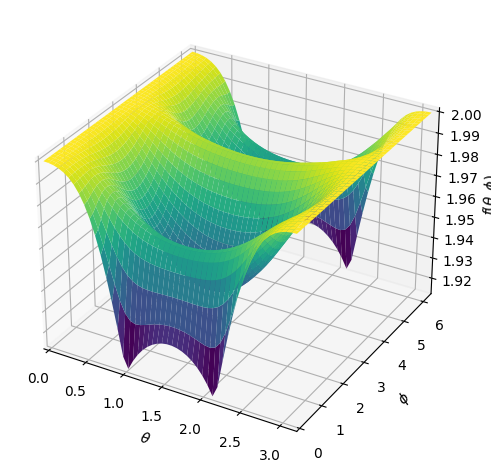

In [16]:
# fidelity vs parameters plot

plotting.plot3d(F,(theta,0,pi),(phi,0,2*pi))

# Conclusiones

Sabemos que un fotón V en el segundo puerto de entrada permite diferenciar las tres cajas. Al parecer, un fotón A en el puerto 2 junto con un HWP1 en un ángulo 3alfa/2 en vez de alfa/2 podrían permitir una mejor distinción. También un fotón L en el puerto 2 con un HWP1 en su valor por default (alfa/2).

Valores por default:

a1 = alpha/2

a2 = opt_a2

a3 = pi/4

a4 = 3pi/4

theta = pi/2


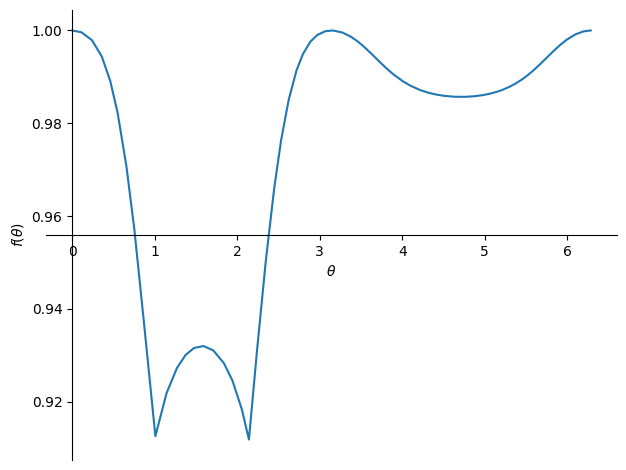

In [17]:
plotting.plot(F.subs(phi,0)-1,(theta,0,2*pi))

# Conclusión

Un mejor parámetro para la distinción es usar HWP1 en un ángulo 3alfa/2 con el fotón V en el puerto 2. A pesar de que la fidelidad disminuye para otros ángulos, este ángulo permite que no haya que usar un detector extra en la salida del puerto 3.